In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [15]:
# Load the CSV file into a DataFrame
csv_file = 'C:/Users/apurv/Desktop/project/performance_metrics-electric-report-full.csv'
df = pd.read_csv(csv_file)

df['accuracy'] = df['accuracy'].apply(lambda x: float(x.split('(')[1].split(',')[0]))

df

,epoch,train_folds,test_folds,phase,loss,accuracy,precision,recall,f1
0,1,"[1, 2, 3, 4]",[0],train,1.264043,0.4818,0.477981,0.481848,0.461986
1,1,"[1, 2, 3, 4]",[0],test,1.258955,0.4658,0.476606,0.478723,0.460179
2,1,"[0, 2, 3, 4]",[1],train,1.247619,0.5230,0.515083,0.523026,0.508797
3,1,"[0, 2, 3, 4]",[1],test,1.249579,0.5556,0.519308,0.529255,0.517030
4,1,"[0, 1, 3, 4]",[2],train,1.240290,0.5133,0.504824,0.513333,0.504374
...,...,...,...,...,...,...,...,...,...
115,12,"[0, 1, 3, 4]",[2],test,0.914125,0.8553,0.832453,0.832447,0.831909
116,12,"[0, 1, 2, 4]",[3],train,0.943209,0.8219,0.820421,0.821918,0.820569
117,12,"[0, 1, 2, 4]",[3],test,0.923232,0.7857,0.811775,0.813830,0.811808
118,12,"[0, 1, 2, 3]",[4],train,0.940021,0.8328,0.831002,0.832787,0.830940


In [16]:
# Group data by epoch and phase, and calculate the mean of the metrics
grouped_metrics = df.groupby(['epoch', 'phase'])['loss', 'accuracy', 'precision', 'recall', 'f1'].mean().reset_index()


grouped_metrics

C:\Users\apurv\AppData\Local\Temp\ipykernel_19132\2580947563.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_metrics = df.groupby(['epoch', 'phase'])['loss', 'accuracy', 'precision', 'recall', 'f1'].mean().reset_index()


,epoch,phase,loss,accuracy,precision,recall,f1
0,1,test,1.237785,0.50520,0.496483,0.509043,0.489031
1,1,train,1.239694,0.51000,0.500004,0.510017,0.488683
2,2,test,1.199994,0.51900,0.534546,0.542553,0.526062
3,2,train,1.198014,0.54838,0.544197,0.548367,0.530546
4,3,test,1.165540,0.54664,0.563383,0.564894,0.546582
5,3,train,1.170285,0.56918,0.571147,0.569186,0.551020
6,4,test,1.138718,0.58536,0.598190,0.602660,0.594366
7,4,train,1.143146,0.60648,0.602234,0.606481,0.597843
8,5,test,1.121401,0.59732,0.623393,0.625000,0.614767
9,5,train,1.118718,0.63162,0.630879,0.631616,0.621270


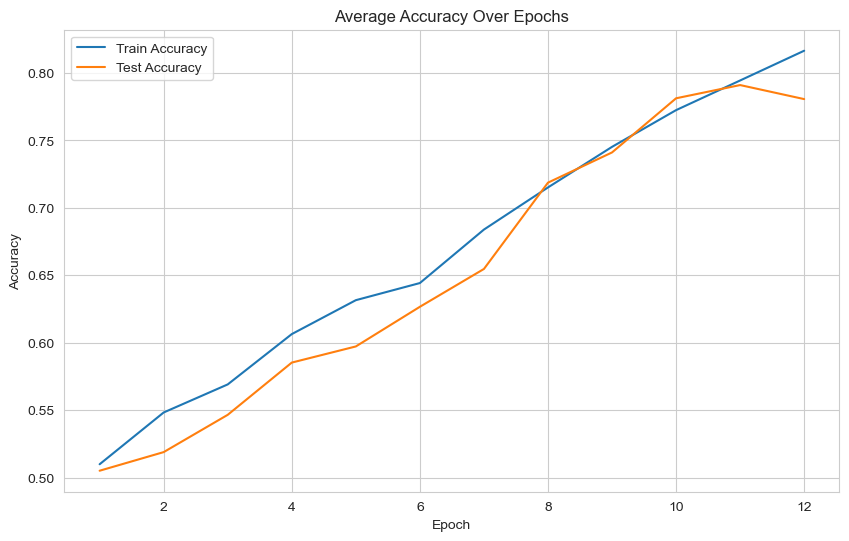

In [17]:
plt.figure(figsize=(10, 6))

for phase in ['train', 'test']:
    phase_data = grouped_metrics[grouped_metrics['phase'] == phase]
    plt.plot(phase_data['epoch'], phase_data['accuracy'], label=f'{phase.capitalize()} Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Average Accuracy Over Epochs')
plt.legend()

plt.show()


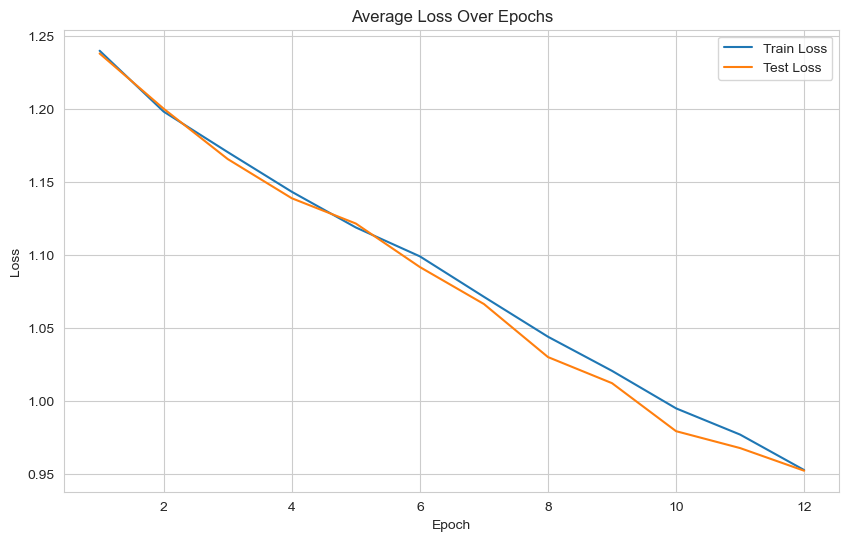

In [18]:
plt.figure(figsize=(10, 6))

for phase in ['train', 'test']:
    phase_data = grouped_metrics[grouped_metrics['phase'] == phase]
    plt.plot(phase_data['epoch'], phase_data['loss'], label=f'{phase.capitalize()} Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Loss Over Epochs')
plt.legend()

plt.show()


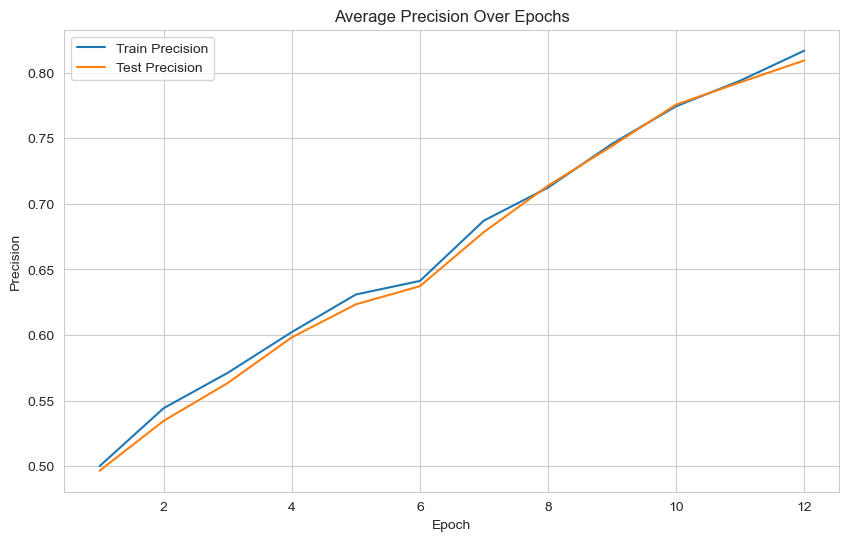

In [19]:
plt.figure(figsize=(10, 6))

for phase in ['train', 'test']:
    phase_data = grouped_metrics[grouped_metrics['phase'] == phase]
    plt.plot(phase_data['epoch'], phase_data['precision'], label=f'{phase.capitalize()} Precision')

plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Average Precision Over Epochs')
plt.legend()

plt.show()


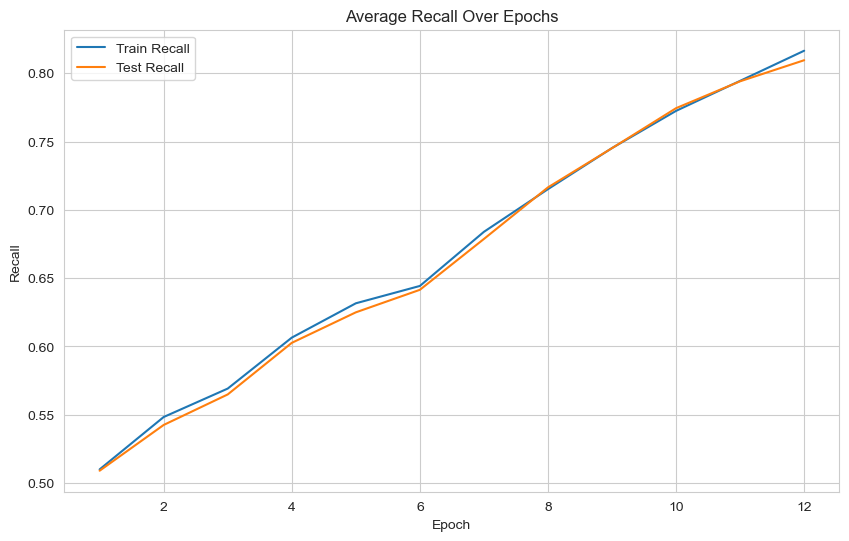

In [20]:
plt.figure(figsize=(10, 6))

for phase in ['train', 'test']:
    phase_data = grouped_metrics[grouped_metrics['phase'] == phase]
    plt.plot(phase_data['epoch'], phase_data['recall'], label=f'{phase.capitalize()} Recall')

plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Average Recall Over Epochs')
plt.legend()

plt.show()


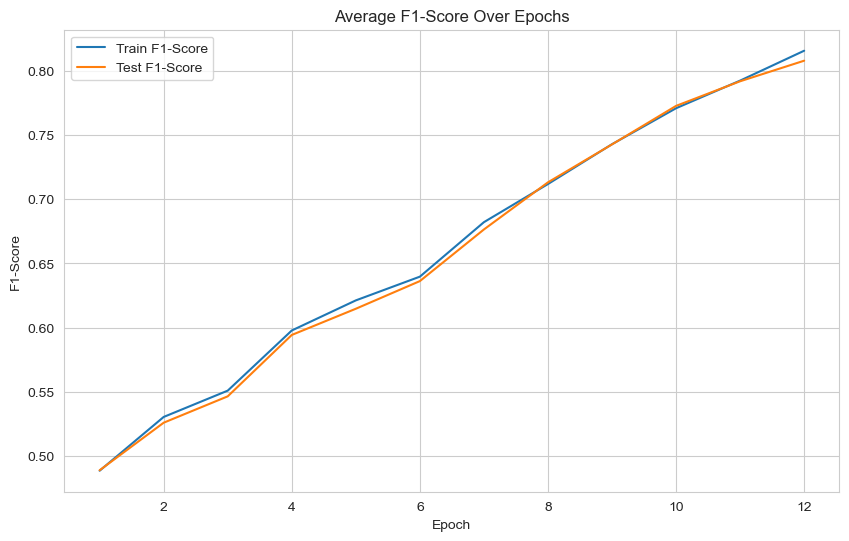

In [21]:
plt.figure(figsize=(10, 6))

for phase in ['train', 'test']:
    phase_data = grouped_metrics[grouped_metrics['phase'] == phase]
    plt.plot(phase_data['epoch'], phase_data['f1'], label=f'{phase.capitalize()} F1-Score')

plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.title('Average F1-Score Over Epochs')
plt.legend()

plt.show()


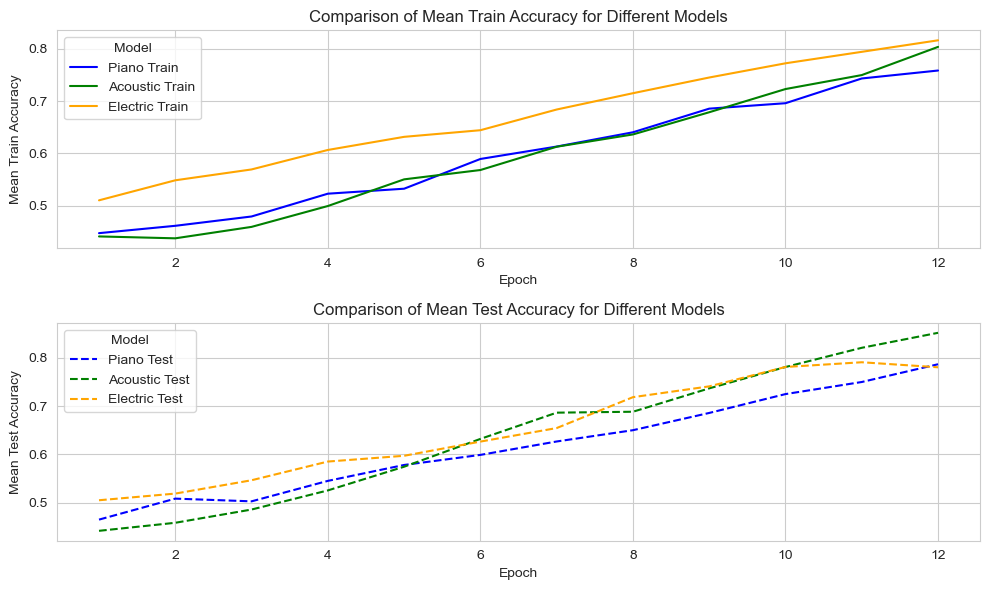

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas DataFrames
df_model1 = pd.read_csv('C:/Users/apurv/Desktop/project/performance_metrics-piano-report-full.csv')  # Replace with your file path
df_model2 = pd.read_csv('C:/Users/apurv/Desktop/project/performance_metrics-acoustic-report-full.csv')  # Replace with your file path
df_model3 = pd.read_csv('C:/Users/apurv/Desktop/project/performance_metrics-electric-report-full.csv')  # Replace with your file path

# Convert the accuracy column from tensor format to float
df_model1['accuracy'] = df_model1['accuracy'].apply(lambda x: float(x.split(',')[0].split('(')[1]))
df_model2['accuracy'] = df_model2['accuracy'].apply(lambda x: float(x.split(',')[0].split('(')[1]))
df_model3['accuracy'] = df_model3['accuracy'].apply(lambda x: float(x.split(',')[0].split('(')[1]))

# Calculate the mean accuracy for each epoch and phase for each model
df_model1_train = df_model1[df_model1['phase'] == 'train'].groupby('epoch')['accuracy'].mean()
df_model1_test = df_model1[df_model1['phase'] == 'test'].groupby('epoch')['accuracy'].mean()

df_model2_train = df_model2[df_model2['phase'] == 'train'].groupby('epoch')['accuracy'].mean()
df_model2_test = df_model2[df_model2['phase'] == 'test'].groupby('epoch')['accuracy'].mean()

df_model3_train = df_model3[df_model3['phase'] == 'train'].groupby('epoch')['accuracy'].mean()
df_model3_test = df_model3[df_model3['phase'] == 'test'].groupby('epoch')['accuracy'].mean()

# Create two line plots, one for train accuracy and one for test accuracy
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
df_model1_train.plot(kind='line', color='blue', label='Piano Train')
df_model2_train.plot(kind='line', color='green', label='Acoustic Train')
df_model3_train.plot(kind='line', color='orange', label='Electric Train')

plt.xlabel('Epoch')
plt.ylabel('Mean Train Accuracy')
plt.title('Comparison of Mean Train Accuracy for Different Models')
plt.legend(title='Model')
plt.xticks(rotation=0)

plt.subplot(2, 1, 2)
df_model1_test.plot(kind='line', color='blue', linestyle='dashed', label='Piano Test')
df_model2_test.plot(kind='line', color='green', linestyle='dashed', label='Acoustic Test')
df_model3_test.plot(kind='line', color='orange', linestyle='dashed', label='Electric Test')

plt.xlabel('Epoch')
plt.ylabel('Mean Test Accuracy')
plt.title('Comparison of Mean Test Accuracy for Different Models')
plt.legend(title='Model')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


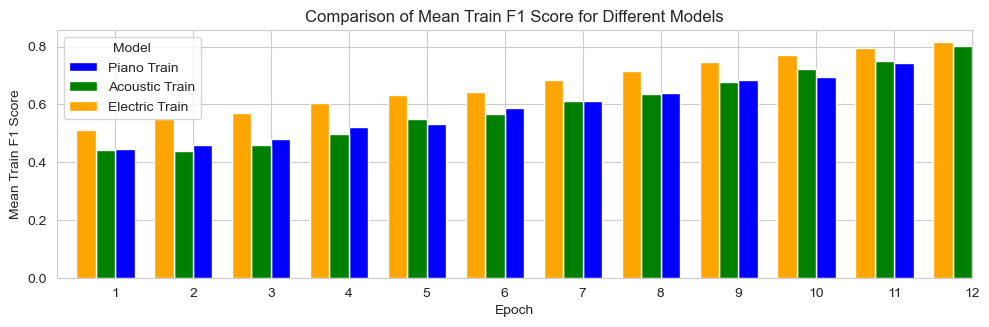

In [3]:
# Create grouped bar plots for train and test F1 scores
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
df_model1_train.plot(kind='bar', color='blue', position=0, width=0.25, label='Piano Train')
df_model2_train.plot(kind='bar', color='green', position=1, width=0.25, label='Acoustic Train')
df_model3_train.plot(kind='bar', color='orange', position=2, width=0.25, label='Electric Train')

plt.xlabel('Epoch')
plt.ylabel('Mean Train F1 Score')
plt.title('Comparison of Mean Train F1 Score for Different Models')
plt.legend(title='Model')
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()

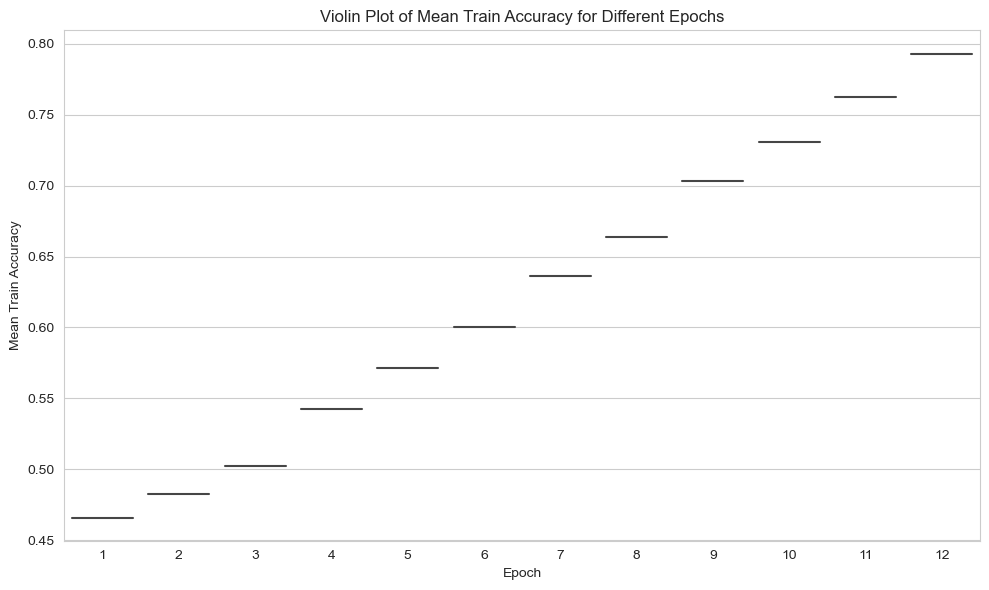

In [4]:
# Load the CSV files into pandas DataFrames
df_model1 = pd.read_csv('C:/Users/apurv/Desktop/project/performance_metrics-piano-report-full.csv')  # Replace with your file path
df_model2 = pd.read_csv('C:/Users/apurv/Desktop/project/performance_metrics-acoustic-report-full.csv')  # Replace with your file path
df_model3 = pd.read_csv('C:/Users/apurv/Desktop/project/performance_metrics-electric-report-full.csv')  # Replace with your file path

# Convert the accuracy column from tensor format to float
df_model1['accuracy'] = df_model1['accuracy'].apply(lambda x: float(x.split(',')[0].split('(')[1]))
df_model2['accuracy'] = df_model2['accuracy'].apply(lambda x: float(x.split(',')[0].split('(')[1]))
df_model3['accuracy'] = df_model3['accuracy'].apply(lambda x: float(x.split(',')[0].split('(')[1]))

# Combine the DataFrames into a single DataFrame
df_combined = pd.concat([df_model1, df_model2, df_model3])

# Calculate the mean train accuracy for each epoch and phase
df_mean_train_accuracy = df_combined[df_combined['phase'] == 'train'].groupby(['epoch', 'phase'])['accuracy'].mean().reset_index()

# Create violin plot for mean train accuracy
plt.figure(figsize=(10, 6))
sns.violinplot(x='epoch', y='accuracy', data=df_mean_train_accuracy, inner="quart")
plt.xlabel('Epoch')
plt.ylabel('Mean Train Accuracy')
plt.title('Violin Plot of Mean Train Accuracy for Different Epochs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()